# 1. Introduction
## 1.1 Methodology
1. Introduction
    * Problem statement
    * Attribute information
2. Data preparation
    * Loading data and libraries
    * Cleaning data
3. Data Visualization
    * Univariate analysis
    * Bivariate analysis
4. Modeling
    * Regression Analysis
5. Recommendations

## 1.2 Problem Statement
The goal is to find out what factors influence a student's grades.

## 1.3 Attribute information
Data set source: https://www.kaggle.com/datasets/dipam7/student-grade-prediction 
- **school**: student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- **sex**: student's sex (binary: 'F' - female or 'M' - male)
- **age**: student's age (numeric: from 15 to 22)
- **address**: student's home address type (binary: 'U' - urban or 'R' - rural)
- **famsize**: family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- **Pstatus**: parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- **Medu**: mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- **Fedu**: father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
- **Mjob**: mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **Fjob**: father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- **reason**: reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- **guardian**: student's guardian (nominal: 'mother', 'father' or 'other')
- **traveltime**: home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
- **studytime**: weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- **failures**: number of past class failures (numeric: n if 1<=n<3, else 4)
- **schoolsup**: extra educational support (binary: yes or no)
- **famsup**: family educational support (binary: yes or no)
- **paid**: extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- **activities**: extra-curricular activities (binary: yes or no)
- **nursery**: attended nursery school (binary: yes or no)
- **higher**: wants to take higher education (binary: yes or no)
- **internet**: Internet access at home (binary: yes or no)
- **romantic**: with a romantic relationship (binary: yes or no)
- **famrel**: quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- **freetime**: free time after school (numeric: from 1 - very low to 5 - very high)
- **goout**: going out with friends (numeric: from 1 - very low to 5 - very high)
- **Dalc**: workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **Walc**: weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- **health**: current health status (numeric: from 1 - very bad to 5 - very good)
- **absences**: number of school absences (numeric: from 0 to 93)
- **G1**: first period grade (numeric: from 0 to 20)
- **G2**: second period grade (numeric: from 0 to 20)
- **G3**: final grade (numeric: from 0 to 20, output target)

# 2. Data Preparation

In [1]:
# installs necessary libraries. To be run ONLY if it's your first time with Jupyter notebook
# !pip3 install numpy pandas seaborn matplotlib scikit-learn scipy

In [2]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sb
import scipy as sp

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# load and preview dataset
data = pd.read_csv('student-mat.csv')
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
data.shape

(395, 33)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [6]:
data[data.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [7]:
data.isna().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

We see that there are no missing values or duplicates so  the data set is practially clean. However, we can also see that some variables are numerical when they should be categorical so we will take care of them.

In [8]:
data['Medu'] = data['Medu'].astype('object')
data['Fedu'] = data['Fedu'].astype('object')
data['traveltime'] = data['traveltime'].astype('object')
data['studytime'] = data['studytime'].astype('object')
data['failures'] = data['failures'].astype('object')
data['famrel'] = data['famrel'].astype('object')
data['freetime'] = data['freetime'].astype('object')
data['goout'] = data['goout'].astype('object')
data['Dalc'] = data['Dalc'].astype('object')
data['Walc'] = data['Walc'].astype('object')
data['health'] = data['health'].astype('object')

data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu          object
Fedu          object
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime    object
studytime     object
failures      object
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel        object
freetime      object
goout         object
Dalc          object
Walc          object
health        object
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

We can now proceed with exploratory data analysis.

# 3. Data Visualization

## 3.1 Univariate Analysis
Univariate analysis is the study of a single variable.

In [9]:
data.describe()

,age,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,5.708861,10.908861,10.713924,10.415190
std,1.276043,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,75.000000,19.000000,19.000000,20.000000


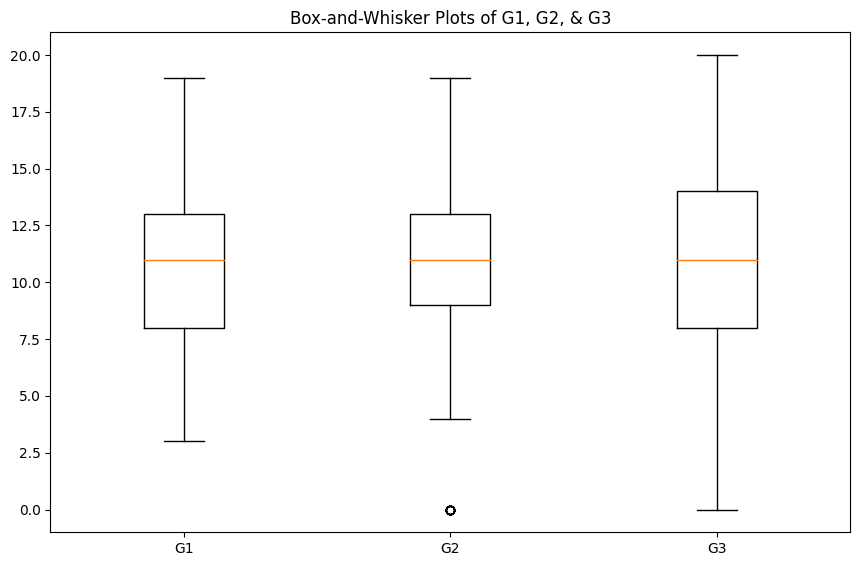

In [10]:
fig = plt.figure(figsize =(8, 5))
ax = fig.add_axes([0, 0, 1, 1])
bp = ax.boxplot([data['G1'], data['G2'], data['G3']])
ax.set_xticklabels(['G1', 'G2', 'G3'])
plt.title('Box-and-Whisker Plots of G1, G2, & G3')
plt.show()

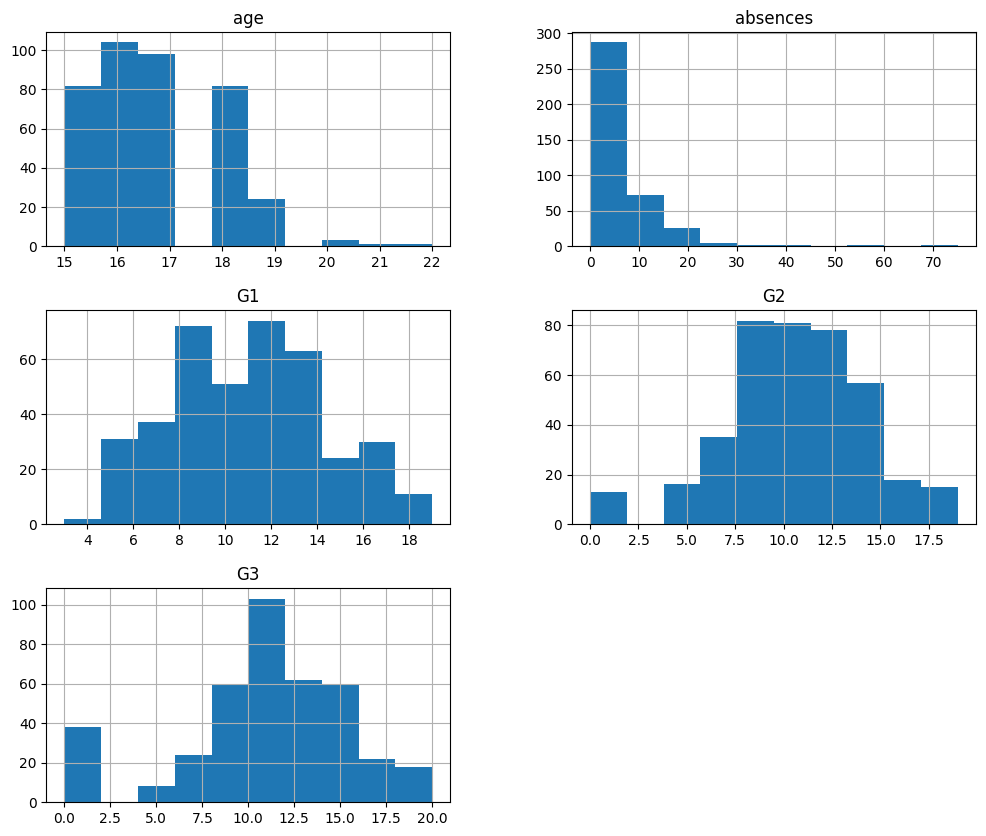

In [11]:
data.hist(figsize = (12, 10))
plt.show()

`Age` ranges from 15 to 22, with a neab if 16..69 and a standard deviation of 1.27.

The means of the three grades are almost the same although the standard deviation of `G3` differs from the other two.

In [12]:
pie_data = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'guardian', 'schoolsup', 'famsup', 
            'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

bar_data = ['Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'traveltime', 'studytime', 'failures',
       'famrel', 'freetime', 'goout', 'Dalc','Walc', 'health']

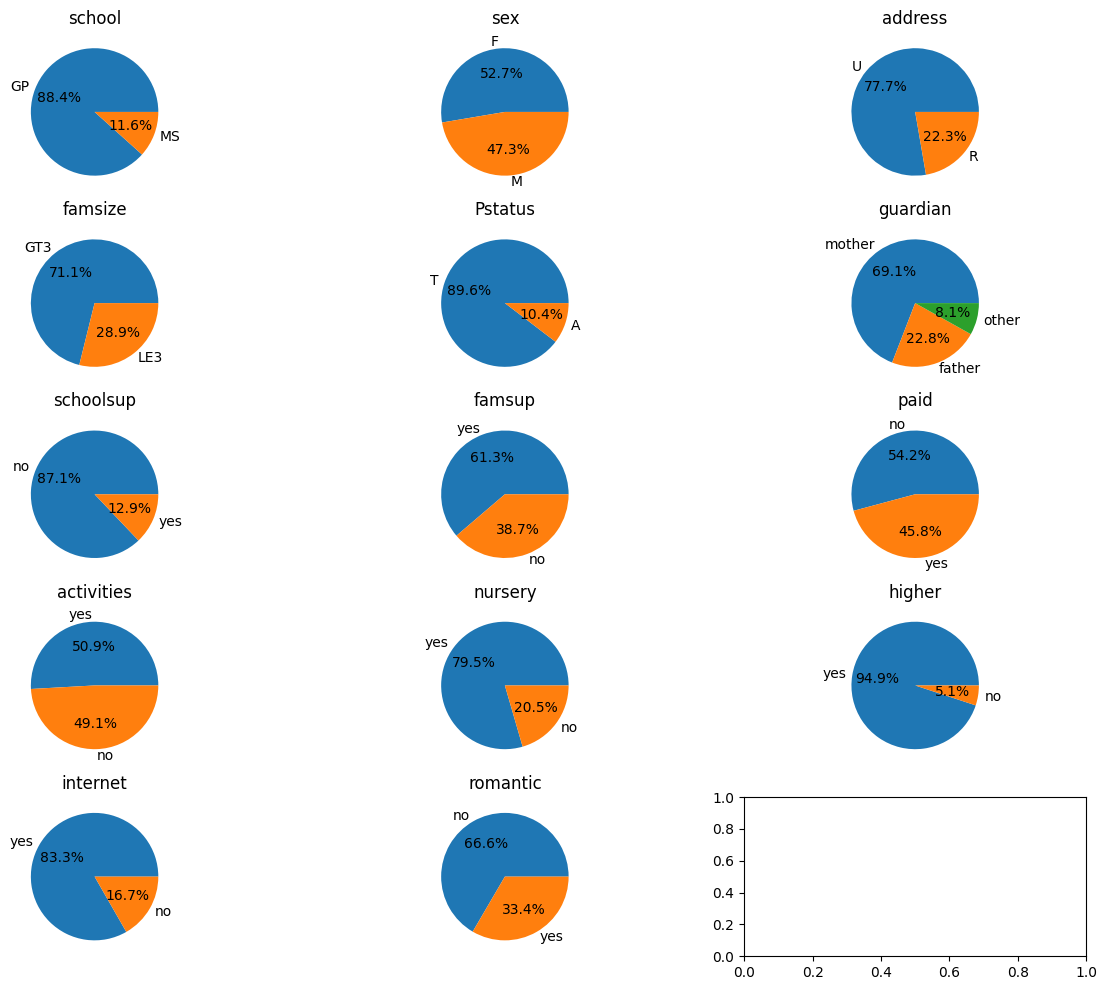

In [13]:
# pie chart distributions
fig, ax = plt.subplots(nrows = 5, ncols = 3, figsize = (15, 12))

for i, col in enumerate(pie_data):
    values = data[col].value_counts()
    ax.flatten()[i].pie(values, labels=values.index, autopct='%1.1f%%')
    ax.flatten()[i].set_title(col)
plt.show()

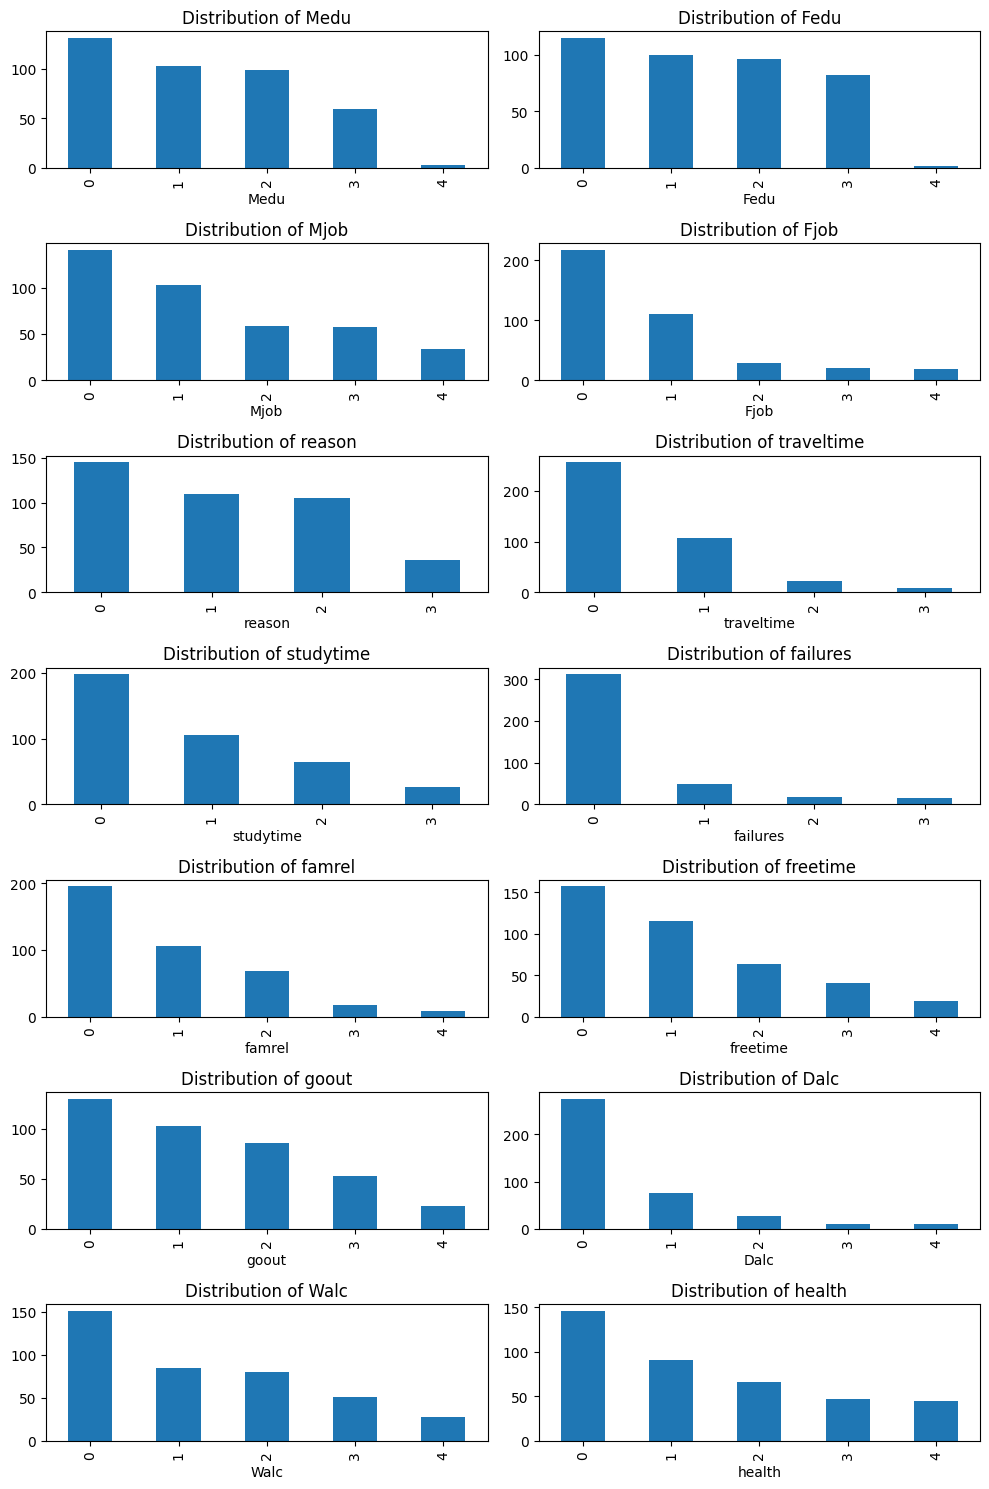

In [14]:
# bar chart distributions
fig, axs = plt.subplots(nrows = 7, ncols = 2, figsize = (10, 15))
all_axs = axs.ravel()

for i, col in enumerate(bar_data):
    ax = data[col].value_counts().plot(kind = 'bar', ax = all_axs[i])
    ax.set_xlabel(col)
    ax.set_xticklabels(ax.get_xticks(), rotation = 90)
    ax.set_title("Distribution of " + col)
plt.tight_layout()

## Bivariate Analysis

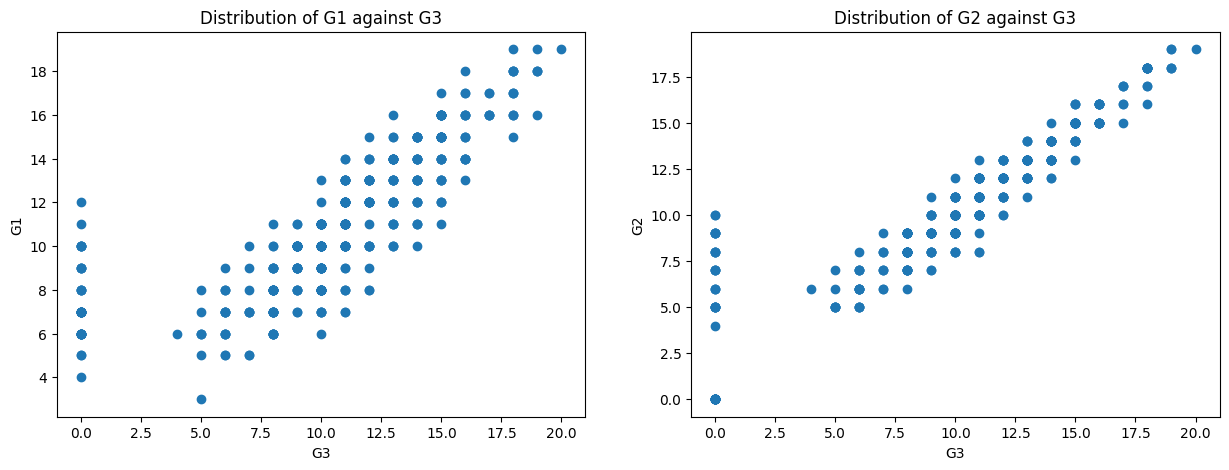

In [15]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

# scatterplot of G1 against G3
ax[0].scatter(data.G3, data.G1)
ax[0].set_xlabel('G3')
ax[0].set_ylabel('G1')
ax[0].set_title('Distribution of G1 against G3')

# scatterplot of G2 against G3
ax[1].scatter(data.G3, data.G2)
ax[1].set_xlabel('G3')
ax[1].set_ylabel('G2')
ax[1].set_title('Distribution of G2 against G3')

plt.show()

From the scatter plots above, we see that both `G1` and `G2` are mainly positively correlated with `G3`.

It's now time to check the correlation between the variables in the data frame using Variance Inflation Factor (VIF). In order to do so, we need all variables to be numerical. We will duplicate a new dataset for this purpose so as to leave the original dataset intact.

In [16]:
num_data = data.copy()

# list of column names
columns = num_data.columns.to_list()

# remove the columns that are already numerical from the list
columns.remove('age')
columns.remove('absences')
columns.remove('G1')
columns.remove('G2')
columns.remove('G3')

# preview your data before encoding
num_data.sample(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
58,GP,M,15,U,LE3,T,1,2,other,at_home,...,4,3,2,1,1,5,2,9,10,9
205,GP,F,17,U,GT3,T,3,4,at_home,services,...,4,4,3,3,4,5,28,10,9,9
304,GP,M,19,U,GT3,T,3,3,other,other,...,4,4,4,1,1,3,20,15,14,13


In [17]:
from sklearn.preprocessing import LabelEncoder 

# dictionary to store each unique variable class
class_dict = {}

# encoding using Label Encoder
for col in columns:
    encoder = LabelEncoder().fit(num_data[col].unique())
    classed = encoder.classes_
    class_dict[col] = classed
    num_data[col] = encoder.transform(num_data[col].values)
    
# preview your data after encoding
num_data.sample(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
105,0,0,15,1,0,0,3,3,2,1,...,3,2,2,0,0,3,10,10,11,11
295,0,1,17,1,0,1,3,3,1,2,...,3,3,2,0,2,4,4,14,12,11
85,0,0,15,1,0,1,4,4,3,3,...,3,3,3,1,2,4,6,7,9,8


In [18]:
# confirming the data set is numerical
num_data.dtypes

school        int64
sex           int64
age           int64
address       int64
famsize       int64
Pstatus       int64
Medu          int64
Fedu          int64
Mjob          int64
Fjob          int64
reason        int64
guardian      int64
traveltime    int64
studytime     int64
failures      int64
schoolsup     int64
famsup        int64
paid          int64
activities    int64
nursery       int64
higher        int64
internet      int64
romantic      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

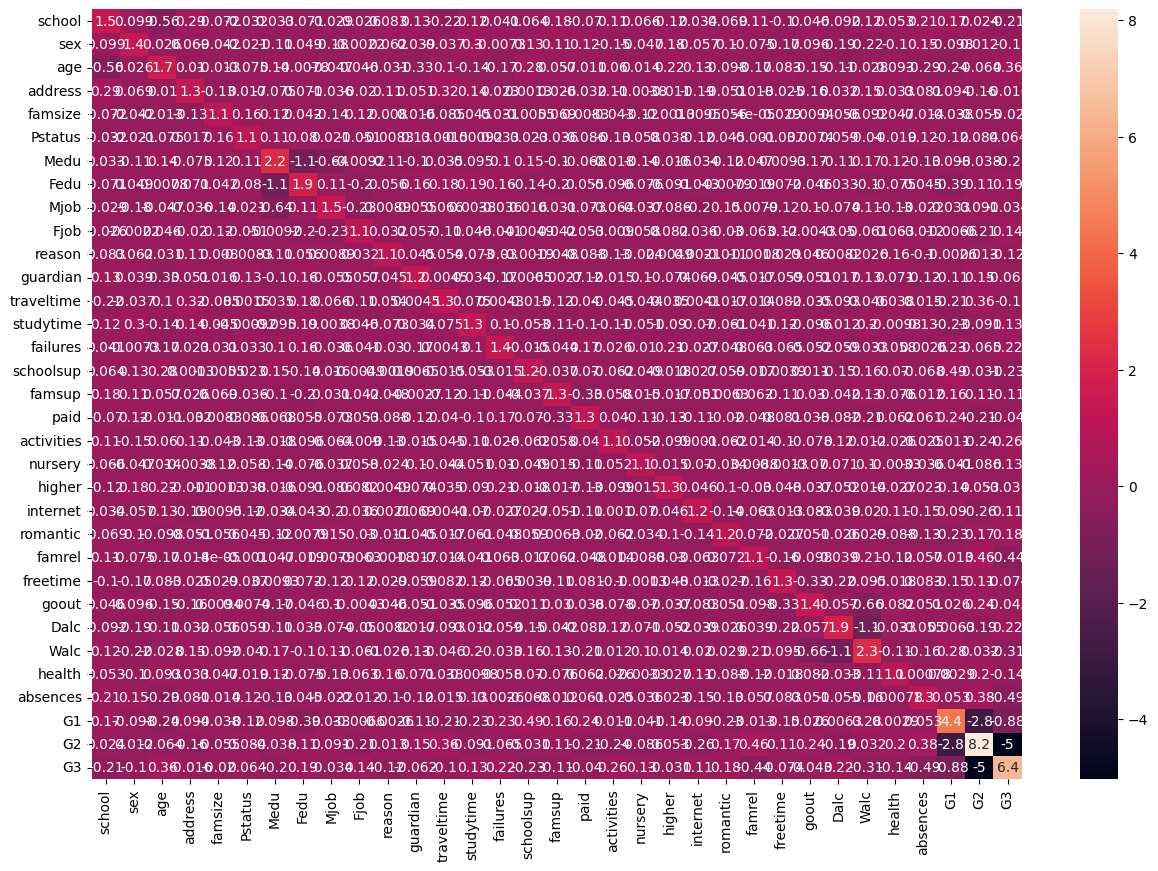

In [19]:
# first we get the correlations
corr = num_data.corr()

# then we get the Variance Inflation Factor (VIF)
vif = pd.DataFrame(np.linalg.inv(corr.values), index = corr.index, columns = corr.columns)

# using a heatmap to display the results
plt.figure(figsize = (15, 10))
sb.heatmap(vif, annot = True)
plt.show()

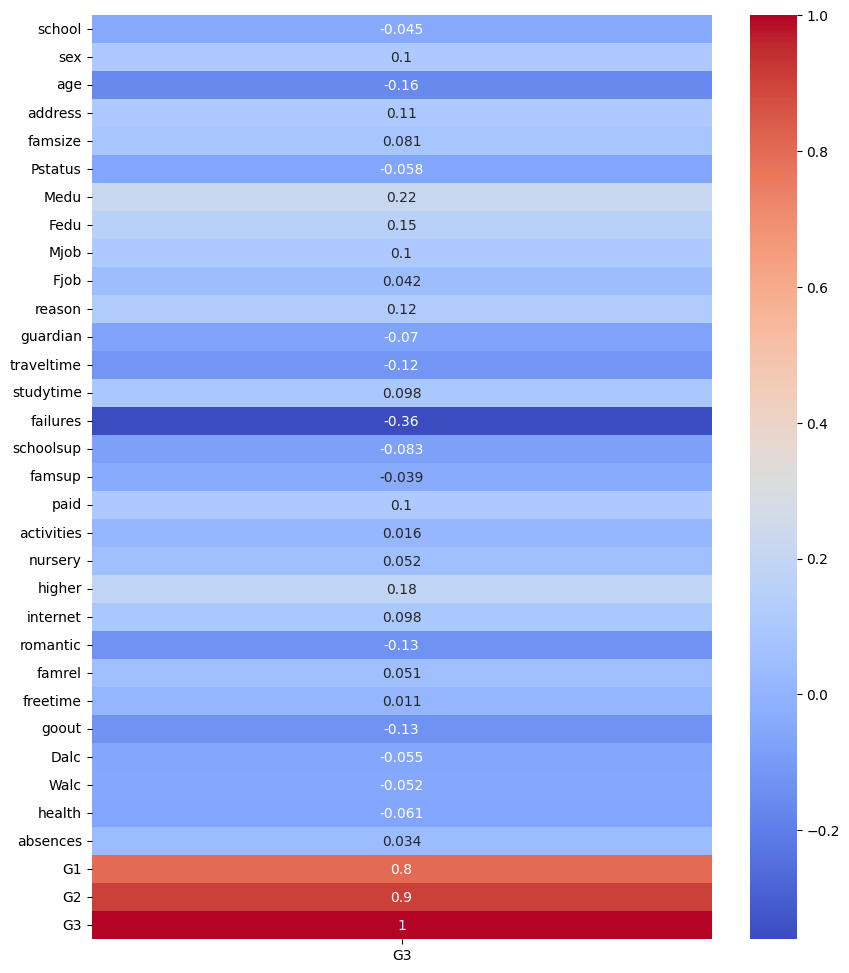

In [20]:
# getting a closer look between the target variable and the independent variables
plt.figure(figsize = (10, 12))
sb.heatmap(pd.DataFrame(corr['G3'], index = corr.index), annot = True, cmap = "coolwarm")
plt.show()

The cut-off point for VIF scores vary from company to company. However, as a rule of thumb, a VIF score of 10 or greater ususlly denotes high multicollinearity and it is recommended that the variables with such scores be removed from the data set. However, since this data set does not have any VIF score exceeding 10, we can leave the data set as it is.

We can see that, although very weak, `G1` and `G2` correlate the most with our target variable. This shows that these two variables have the most impact on the target variable.

# 4. Modeling
Since we are trying to predict the `G3` variable which is numerical, we will use linear regression for our regression analysis.

In [21]:
# splitting the dataset into independent variables (X) and the target (y)
X = num_data.drop(columns = 'G3')
y = num_data['G3']
print(X.shape)
print(y.shape)

(395, 32)
(395,)


In [22]:
# splitting the dataset into 80% training data and 20% test data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(316, 32) (79, 32)
(316,) (79,)


In [23]:
# before carrying out regression analysis, it is important to scale the independent features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [24]:
# carrying out linear regression
from sklearn.linear_model import LinearRegression

# fit the linear regression model to our training data
reg = LinearRegression()
reg.fit(X_train_sc, y_train)

# make predictions
y_pred = reg.predict(X_test_sc)

# compare the predicted values to the actual values
predicted_vs_actual = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predicted_vs_actual.sample(5)

,Actual,Predicted
270,9,7.489426
138,12,12.349375
262,12,11.754751
105,11,12.328833
228,9,7.271137


In [25]:
# assessing the model's accuracy
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", RMSE)
print("Mean of target variable:", num_data.G3.mean())

Root Mean Squared Error: 1.9361783417035308
Mean of target variable: 10.415189873417722


Root Mean Squared Error (RMSE) is a commonly used metric for evaluating the accuracy of a regression model. It measures the difference between the predicted values of the dependent variable and the actual observed values, and it represents the standard deviation of the residuals or errors of the model. RMSE is important because it provides a single number that summarizes how well the model is able to predict the dependent variable. Lower values of RMSE indicate better performance of the model, while higher values indicate poorer performance. 

# 5. Recommendations
* Deeper investigation of variables, especially in relation to the target variables
* Hyperparameter tuning
* Use other regression techniques